In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency


## client profile data


In [3]:
df_client = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt')

In [4]:
df_client.head(2)
df_client.columns 
df_client.shape 

(70609, 9)

In [5]:
df_client[df_client['client_id'] == 5618665]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
32834,5618665,54.0,655.0,39.0,F,2.0,70645.03,2.0,5.0


#### clean column names

In [6]:

df_client.rename(columns={'gendr':'gender',
                          'clnt_tenure_yr':'client_tenure_year',
                          'clnt_tenure_mnth':'client_tenure_month',
                          'clnt_age':'client_age',
                          'num_accts':'number_of_accounts',
                          'calls_6_mnth':'calls_6_month',
                          'logons_6_mnth':'logos_6_month',
                          'bal':'balance'},inplace=True)


#### handle null values

In [7]:
df_client.isna().sum()

display(df_client[df_client.isna().any(axis=1)])

,client_id,client_tenure_year,client_tenure_month,client_age,gender,number_of_accounts,balance,calls_6_month,logos_6_month
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# for client_id = 4666211/index = 9583, fill age with mean_age
df_client.at[9583, 'client_age'] = df_client['client_age'].mean() 


# for the rest, fill with -1 if numeric variable or 'unknown' if categorical variable
df_client.fillna({
    'client_tenure_year': -1,
    'client_tenure_month': -1,
    'client_age':-1,
    'gender':'unknown',
    'number_of_accounts':-1,
    'balance':-1,
    'calls_6_month':-1,
    'logos_6_month':-1,},inplace=True)

df_client.isna().sum()

client_id              0
client_tenure_year     0
client_tenure_month    0
client_age             0
gender                 0
number_of_accounts     0
balance                0
calls_6_month          0
logos_6_month          0
dtype: int64

#### column gender-> replace 'X' and 'U' with 'unknown', create new column: gender_cleaned

In [9]:
df_client['gender'].value_counts()

gender
U          24122
M          23724
F          22746
unknown       14
X              3
Name: count, dtype: int64

In [10]:
df_client['gender_cleaned'] = df_client['gender'].replace({'X':'unknown','U':'unknown'})
df_client['gender_cleaned'].value_counts()

gender_cleaned
unknown    24139
M          23724
F          22746
Name: count, dtype: int64

#### univariate analysis

In [11]:
df_client.nunique()

client_id              70609
client_tenure_year        55
client_tenure_month      483
client_age               167
gender                     5
number_of_accounts         9
balance                70334
calls_6_month              9
logos_6_month             10
gender_cleaned             3
dtype: int64

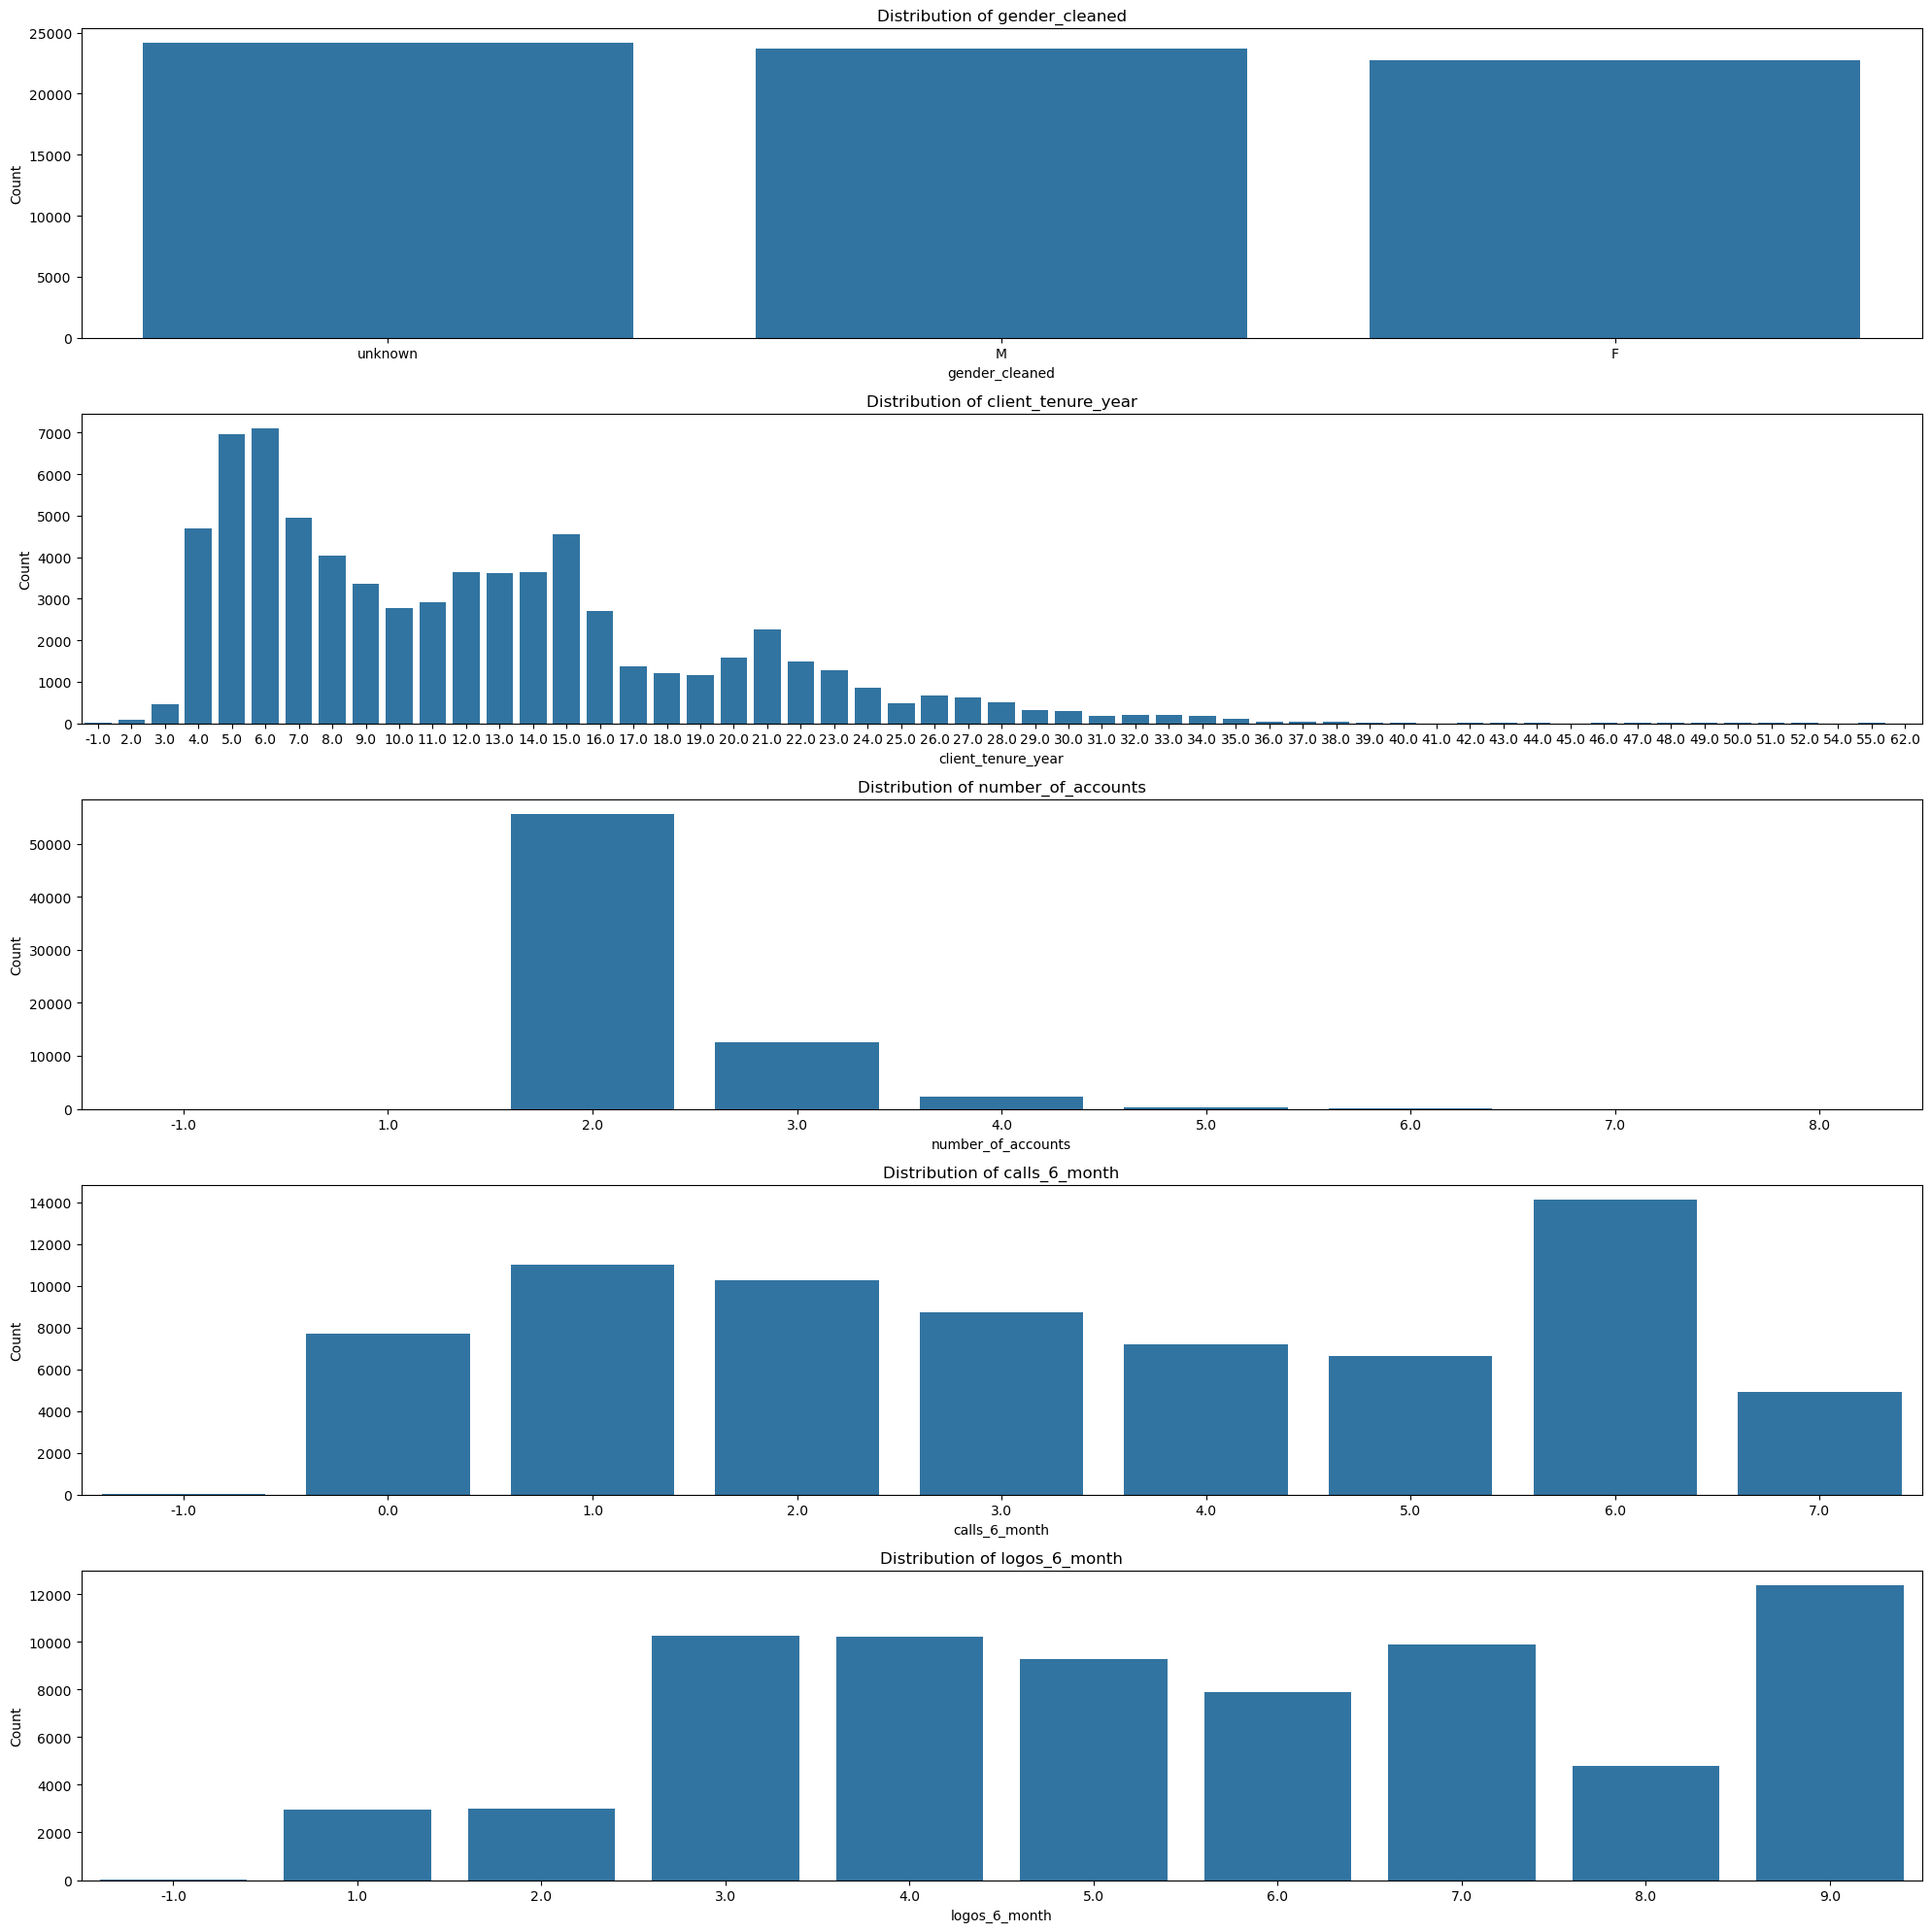

In [12]:
# barplot --->  categorical variable + numeric discrete variables 

categorical_cols = ['gender_cleaned', 'client_tenure_year', 'number_of_accounts','calls_6_month','logos_6_month']

fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(20, 4*len(categorical_cols)))

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_client, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


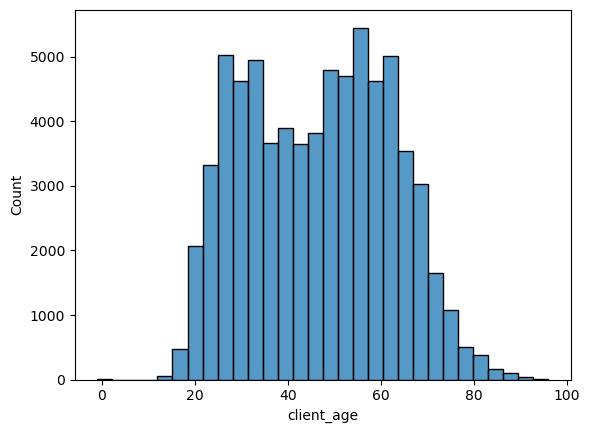

In [13]:
# histogram --->  numeric continuous variables , numeric_cols = ['client_tenure_month','client_age','balance']

# fixed_sized binning
sns.histplot(df_client['client_age'],bins=30) 
plt.show()


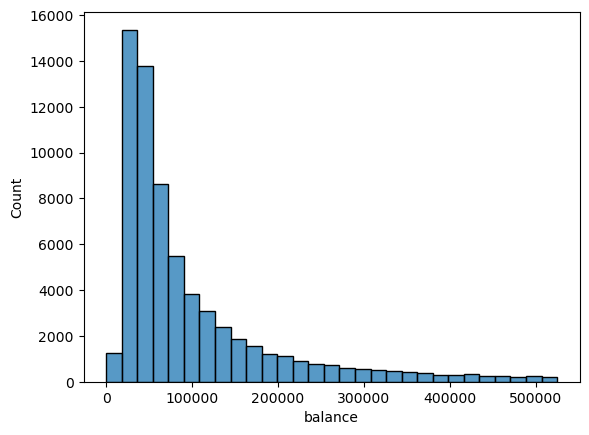

In [14]:
# quantile binning
p95_balance = df_client['balance'].quantile(0.95)

balance_below_95 = df_client[df_client['balance'] <= p95_balance]['balance']
balance_below_95

bin_edges = np.linspace(balance_below_95.min(),balance_below_95.max(),30)

sns.histplot(df_client['balance'],bins=bin_edges )  

plt.show()


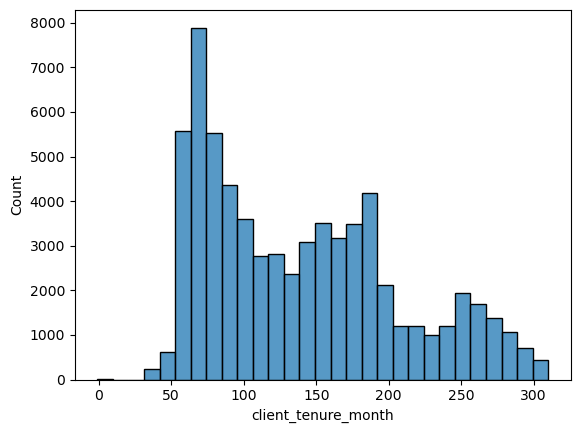

In [15]:
# quantile binning 
p95_month = df_client['client_tenure_month'].quantile(0.95)

balance_below_95 = df_client[df_client['client_tenure_month'] <= p95_month]['client_tenure_month']
balance_below_95

bin_edges = np.linspace(balance_below_95.min(),balance_below_95.max(),30)

sns.histplot(df_client['client_tenure_month'],bins=bin_edges )  

plt.show()


#### bivariate analysis

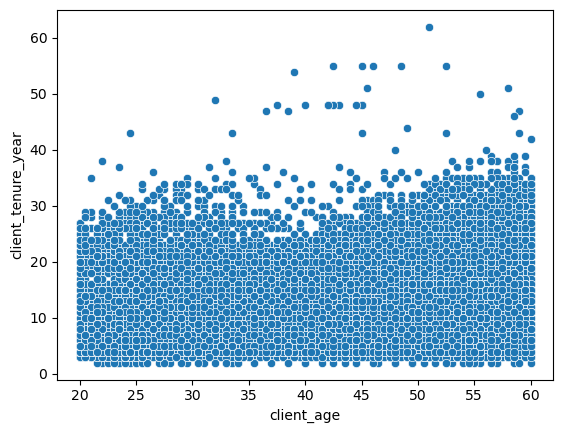

In [16]:
# age - tenure year relationship
df_primary_client = df_client[(df_client['client_age']>=20)& (df_client['client_age'] <= 60)]
sns.scatterplot(data = df_primary_client, x = 'client_age',y = 'client_tenure_year')
plt.show()

## Digital Footprints data

In [17]:
df_footprints_1 = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt')
df_footprints_2 = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt')

df_footprints_1.columns, df_footprints_2.columns

(Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object'),
 Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object'))

In [18]:
df_footprints_1.dtypes, df_footprints_2.dtypes

(client_id        int64
 visitor_id      object
 visit_id        object
 process_step    object
 date_time       object
 dtype: object,
 client_id        int64
 visitor_id      object
 visit_id        object
 process_step    object
 date_time       object
 dtype: object)

#### change dtype for date_time column 

In [19]:
# date_time column, object dtype ---> datetime dtype(each value is datetime object)
df_footprints_1['date_time'] = pd.to_datetime(df_footprints_1['date_time'],errors = 'coerce')
df_footprints_1['date_time'].isna().sum()
df_footprints_2['date_time'] = pd.to_datetime(df_footprints_2['date_time'],errors = 'coerce')
df_footprints_2['date_time'].isna().sum()

df_footprints_1.dtypes, df_footprints_2.dtypes

(client_id                int64
 visitor_id              object
 visit_id                object
 process_step            object
 date_time       datetime64[ns]
 dtype: object,
 client_id                int64
 visitor_id              object
 visit_id                object
 process_step            object
 date_time       datetime64[ns]
 dtype: object)

#### drop duplicate rows in 2 datasets 

In [20]:
df_footprints_1.duplicated().sum(), df_footprints_2.duplicated().sum()

(np.int64(2095), np.int64(8669))

In [21]:
df_footprints_1.drop_duplicates(inplace=True)
df_footprints_2.drop_duplicates(inplace=True)
df_footprints_1.duplicated().sum(), df_footprints_2.duplicated().sum()

(np.int64(0), np.int64(0))

#### concat two dataframes

In [22]:
df_footprints_combined = pd.concat([df_footprints_1,df_footprints_2],ignore_index=True)

df_footprints_combined.shape, df_footprints_combined.duplicated().sum()

((744641, 5), np.int64(0))

In [23]:
df_footprints_combined.nunique()

client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64

#### explore date time 

In [24]:
df_footprints_combined['date_time'].min(),df_footprints_combined['date_time'].max()

(Timestamp('2017-03-15 00:03:03'), Timestamp('2017-06-20 23:59:57'))

In [25]:
df_footprints_combined.tail(3)

,client_id,visitor_id,visit_id,process_step,date_time
744638,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
744639,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34
744640,674799,947159805_81558194550,86152093_47511127657_716022,start,2017-06-03 12:17:09


In [26]:
display(df_footprints_combined[df_footprints_combined['client_id'] == 9668240].sort_values(by=["client_id","visit_id","date_time"]))
df_footprints_combined[df_footprints_combined['client_id'] == 9668240].sort_values(by=["client_id","visit_id","date_time"]).groupby(["client_id","visit_id"])["date_time"].diff()

,client_id,visitor_id,visit_id,process_step,date_time
744639,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34
744638,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
744637,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
744636,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
744635,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:48:02
744634,9668240,388766751_9038881013,922267647_3096648104_968866,step_2,2017-05-24 18:48:11
744633,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:49:35
744632,9668240,388766751_9038881013,922267647_3096648104_968866,step_2,2017-05-24 18:49:36
744631,9668240,388766751_9038881013,922267647_3096648104_968866,step_3,2017-05-24 18:51:04
744630,9668240,388766751_9038881013,922267647_3096648104_968866,step_2,2017-05-24 18:51:15


744639               NaT
744638   0 days 00:00:17
744637   0 days 00:00:38
744636   0 days 00:00:41
744635   0 days 00:01:52
744634   0 days 00:00:09
744633   0 days 00:01:24
744632   0 days 00:00:01
744631   0 days 00:01:28
744630   0 days 00:00:11
744629   0 days 00:00:22
744628   0 days 00:10:27
744627   0 days 00:00:15
744626   0 days 00:00:18
744625   0 days 00:01:23
744624   0 days 00:00:03
744623   0 days 00:00:40
744622   0 days 00:00:24
744621   0 days 00:00:07
744620   0 days 00:02:21
Name: date_time, dtype: timedelta64[ns]

## Experiment data

In [27]:

df_experiments = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt')

df_experiments.columns, df_experiments.shape,df_experiments.dtypes


(Index(['client_id', 'Variation'], dtype='object'),
 (70609, 2),
 client_id     int64
 Variation    object
 dtype: object)

In [28]:
 # rename column Variation-> variation
df_experiments.rename(columns={'Variation':'variation'},inplace=True)

In [29]:
# handle null values in column 'Variation', fill with 'unknown'
df_experiments.isna().sum()
df_experiments['variation_cleaned'] = df_experiments['variation'].fillna('unknown')

In [30]:
df_experiments['variation_cleaned'].value_counts()

variation_cleaned
Test       26968
Control    23532
unknown    20109
Name: count, dtype: int64

## combine all data sources, df_final (744641, 14), use gender_clean, variation_clean

In [31]:
# digital footprint is main table , merge 3 datasets

df1= pd.merge(left=df_footprints_combined,right=df_experiments,how='left', on='client_id')
df_final = pd.merge(left = df1,right=df_client, how='left',on = 'client_id')

In [32]:
df_final.shape, df_final.isna().sum()


((744641, 16),
 client_id                   0
 visitor_id                  0
 visit_id                    0
 process_step                0
 date_time                   0
 variation              427406
 variation_cleaned      300744
 client_tenure_year     300744
 client_tenure_month    300744
 client_age             300744
 gender                 300744
 number_of_accounts     300744
 balance                300744
 calls_6_month          300744
 logos_6_month          300744
 gender_cleaned         300744
 dtype: int64)

In [33]:
display(df_final[df_final.isna().any(axis=1)])

,client_id,visitor_id,visit_id,process_step,date_time,variation,variation_cleaned,client_tenure_year,client_tenure_month,client_age,gender,number_of_accounts,balance,calls_6_month,logos_6_month,gender_cleaned
245,8932927,485163175_18149554449,883578716_57691052399_945047,step_1,2017-04-13 22:37:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,1208567,490822748_12476046982,63636232_1058424732_545130,start,2017-04-24 14:03:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,9838496,408959474_91766774102,687233905_42314307889_453394,start,2017-03-24 21:26:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,2353261,387293592_26815377704,269923351_29360137819_823850,step_1,2017-03-20 16:07:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
860,2353261,387293592_26815377704,269923351_29360137819_823850,confirm,2017-03-20 16:05:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744636,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744637,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744638,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744639,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# fill all null values (clients that are in footprint but not in in client profile) 

def handle_null(col):
    if np.issubdtype(col.dtype, np.number):  # float64 columns
        return col.fillna(-1)
    elif col.dtype.kind == 'O':
        return col.fillna('unknown')
    else:
        return col

df_final = df_final.apply(handle_null)

df_final.isna().sum()

client_id              0
visitor_id             0
visit_id               0
process_step           0
date_time              0
variation              0
variation_cleaned      0
client_tenure_year     0
client_tenure_month    0
client_age             0
gender                 0
number_of_accounts     0
balance                0
calls_6_month          0
logos_6_month          0
gender_cleaned         0
dtype: int64